In [ ]:
!pip install praw

     |████████████████████████████████| 176 kB 7.6 MB/s 
     |████████████████████████████████| 53 kB 1.4 MB/s 


In [ ]:
import praw
import pandas as pd
import datetime as dt 

https://www.reddit.com/prefs/apps

In [ ]:
#Authorized Reddit Instance
reddit = praw.Reddit(client_id ='**', # PUT YOUR OWN ID
                     client_secret ='***', # PUT YOUR OWN SECRET KEY
                     user_agent ='Accordi___**',
                     username = '',
                     password = '',
                     check_for_async=False) 

In [ ]:
subreddit1 = reddit.subreddit('minecraft')
python_subreddit = subreddit1.hot(limit=10000)

In [ ]:
dict = { "title":[],
                "subreddit":[],
                "score":[], 
                "id":[], 
                "url":[], 
                "comms_num": [], 
                "created": [], 
                "body":[]}

In [ ]:
for submission in python_subreddit:
    dict["title"].append(submission.title)
    dict['subreddit'].append(submission.subreddit)
    dict["score"].append(submission.score)
    dict["id"].append(submission.id)
    dict["url"].append(submission.url)
    dict["comms_num"].append(submission.num_comments)
    dict["created"].append(submission.created)
    dict["body"].append(submission.selftext)

In [ ]:
mine=pd.DataFrame(dict)

In [ ]:
mine

,title,subreddit,score,id,url,comms_num,created,body
0,Minecraft Java Edition 1.18.1 has been released!,Minecraft,2196,rd5pjr,https://www.reddit.com/r/Minecraft/comments/rd...,311,1.639132e+09,We’re now releasing Minecraft: Java Edition 1....
1,Minecraft Bi-Weekly Build Challenge #139: Ski ...,Minecraft,251,rjyz6b,https://www.reddit.com/r/Minecraft/comments/rj...,18,1.639928e+09,#**[LAST WEEK'S THEME: WATERMILL](https://www....
2,I found this cool visual trick with spectator ...,Minecraft,9434,rsfsjl,https://v.redd.it/ty4ulk6mnr881,87,1.640908e+09,
3,Why did all my villagers disappear!??,Minecraft,15430,rs8h55,https://i.redd.it/lyb7g10b3q881.jpg,1171,1.640889e+09,
4,I made Minecraft parkour that builds itself,Minecraft,1558,rsgir7,https://v.redd.it/szmmrgqxtr881,55,1.640910e+09,
...,...,...,...,...,...,...,...,...
858,Why does this keep happening?? Dirt keeps form...,Minecraft,28,rrfy0g,https://i.redd.it/50srz6776j881.jpg,46,1.640805e+09,
859,What should I build on this platform in the ci...,Minecraft,7,rrpgak,https://i.redd.it/ssyh1vfp7l881.png,6,1.640830e+09,
860,Minecraft won’t install even though I’m connec...,Minecraft,4,rrt17d,https://i.redd.it/glx8h4t03m881.jpg,4,1.640840e+09,
861,Finding end stronghold,Minecraft,1,rs0p4y,https://www.reddit.com/r/Minecraft/comments/rs...,6,1.640867e+09,So today a friend and I were looking for the e...


In [ ]:
mine.to_csv("mine_reddit_31DEC2021.csv", index=False)

In [ ]:
mine=pd.read_csv("nlp_reddit2.csv")

In [ ]:
mine

,title,subreddit,score,id,url,comms_num,created,body
0,This subreddit is about the PSYCHOLOGICAL TECH...,NLP,59,lfhuhu,https://www.reddit.com/r/NLP/comments/lfhuhu/t...,15,1.612808e+09,Are you interested in Natural Language Process...
1,Self-Promotion Thread | October — December 2021,NLP,3,pz3cv2,https://www.reddit.com/r/NLP/comments/pz3cv2/s...,2,1.633075e+09,This post is for any and all self-promotional ...
2,[Anchoring] Examples of « Feeling Powerful » m...,NLP,3,rqpslg,https://www.reddit.com/r/NLP/comments/rqpslg/a...,3,1.640726e+09,"In the process of anchoring, it can be hard fo..."
3,Just sold 7/8 of my NLP and personal developme...,NLP,11,rpn2dz,https://www.reddit.com/r/NLP/comments/rpn2dz/j...,4,1.640610e+09,Have you had a similar experience?\n\nI know e...
4,Just for fun....,NLP,2,rplcsj,https://www.youtube.com/watch?v=xnSq6rFSucw,4,1.640604e+09,NaN
...,...,...,...,...,...,...,...,...
974,HOW TO LET GO OF A TOXIC PERSON | SITUATION | ...,NLP,2,8ffumg,https://www.youtube.com/attribution_link?a=uK5...,1,1.524871e+09,NaN
975,HOW TO BECOME MORE PERSUASIVE | INFLUENTIAL | ...,NLP,2,8exalt,https://www.youtube.com/attribution_link?a=YzN...,1,1.524692e+09,NaN
976,Looking for a Discord server on NLP,NLP,3,8evgge,https://www.reddit.com/r/NLP/comments/8evgge/l...,3,1.524678e+09,Does anyone know of a NLP focused discord server?
977,WHAT INSPIRES US? | MIRROR NEURONS | PATTERN &...,NLP,3,8epxpm,https://www.youtube.com/attribution_link?a=HTo...,3,1.524621e+09,NaN


In [ ]:
list(mine.title)[200]

'Would love to hear your success stories.'

In [ ]:
list(mine.body)[200]

'As the title says, I really want to hear from real people out there who did a 180 of their life by using NLP principles.'

In [ ]:
mine2=mine[mine.body.isnull()==False]

In [ ]:
mine3=mine2[mine2.body.apply(lambda x: len(x)>2)]

In [ ]:
mine3.shape

(444, 8)

In [ ]:
mine3

,title,subreddit,score,id,url,comms_num,created,body
0,This subreddit is about the PSYCHOLOGICAL TECH...,NLP,59,lfhuhu,https://www.reddit.com/r/NLP/comments/lfhuhu/t...,15,1.612808e+09,Are you interested in Natural Language Process...
1,Self-Promotion Thread | October — December 2021,NLP,3,pz3cv2,https://www.reddit.com/r/NLP/comments/pz3cv2/s...,2,1.633075e+09,This post is for any and all self-promotional ...
2,[Anchoring] Examples of « Feeling Powerful » m...,NLP,3,rqpslg,https://www.reddit.com/r/NLP/comments/rqpslg/a...,3,1.640726e+09,"In the process of anchoring, it can be hard fo..."
3,Just sold 7/8 of my NLP and personal developme...,NLP,11,rpn2dz,https://www.reddit.com/r/NLP/comments/rpn2dz/j...,4,1.640610e+09,Have you had a similar experience?\n\nI know e...
5,Best youtube channels to learn NLP Techniques,NLP,10,rot6xl,https://www.reddit.com/r/NLP/comments/rot6xl/b...,4,1.640509e+09,Hi everyone!\n\n&#x200B;\n\nIm interessted in ...
...,...,...,...,...,...,...,...,...
967,HOW TO DEAL WITH A BULLY | NLP REFRAME,NLP,0,8hbnj2,https://www.reddit.com/r/NLP/comments/8hbnj2/h...,0,1.525567e+09,\*\*\*Scroll to Bottom for Video\*\*\*\n\n**HO...
968,NLP Anchoring and drugs,NLP,5,8h8fx0,https://www.reddit.com/r/NLP/comments/8h8fx0/n...,5,1.525536e+09,"*First and foremost, I would like to state tha..."
972,Help with embedded commands please,NLP,3,8gmwf0,https://www.reddit.com/r/NLP/comments/8gmwf0/h...,8,1.525313e+09,I know the theory of how they work. I tried it...
973,NLP in New York,NLP,3,8fqxkb,https://www.reddit.com/r/NLP/comments/8fqxkb/n...,5,1.525003e+09,I’m fascinated with NLP and am looking for a q...


In [ ]:
pip install -U sentence-transformers

     |████████████████████████████████| 78 kB 4.5 MB/s 
     |████████████████████████████████| 3.4 MB 16.0 MB/s 
     |████████████████████████████████| 6.8 MB 51.3 MB/s 
     |████████████████████████████████| 1.2 MB 55.0 MB/s 
     |████████████████████████████████| 61 kB 581 kB/s 
     |████████████████████████████████| 596 kB 74.3 MB/s 
     |████████████████████████████████| 895 kB 65.0 MB/s 
     |████████████████████████████████| 3.3 MB 42.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=925731c8014245ddf12473b5596b8bc66499de1d1ae0ad646a28992a69c51cbf
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.', 
    'I ate the cake bla bla']

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

In [ ]:
embeddings.shape

(4, 384)

In [ ]:
emds=model.encode(list(mine3.body))

In [ ]:
emds.shape

(444, 384)

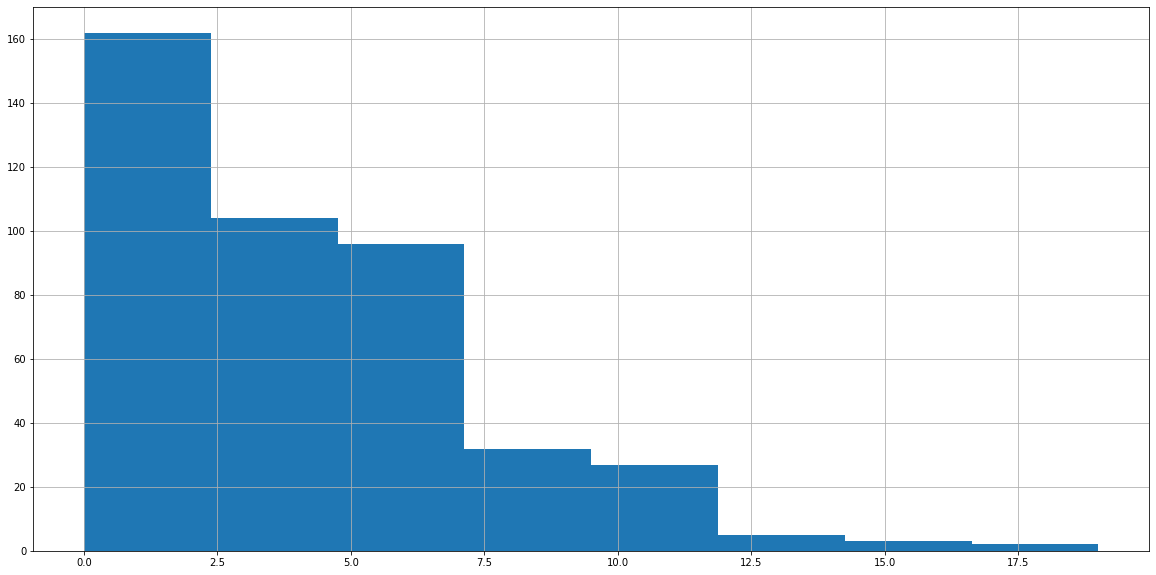

In [ ]:
mine3[mine3.score<20].score.hist(bins=8, figsize =(20,10))

In [ ]:
y= mine2.score>3

In [ ]:
sum(y), len(y)

(221, 444)

In [ ]:
X=emds

In [ ]:
from sklearn.svm import SVC
cls= SVC()
cls.fit(X,y)

SVC()

In [ ]:
cls.score(X,y)

0.9099099099099099

In [ ]:
X.shape

(444, 384)

In [ ]:
X_train= X[:300]
y_train=y[:300]
X_test= X[300:]
y_test=y[300:]

In [ ]:
cls= SVC()
cls.fit(X_train,y_train)
cls.score(X_train, y_train)

0.9166666666666666

In [ ]:
cls.score(X_test, y_test)

0.4652777777777778

In [ ]:
sum(y_test), len(y_test), sum(y_test) / len(y_test)

(67, 144, 0.4652777777777778)

In [ ]:
pip install gradio

     |████████████████████████████████| 900 kB 6.8 MB/s 
     |████████████████████████████████| 2.0 MB 56.6 MB/s 
     |████████████████████████████████| 210 kB 47.8 MB/s 
     |████████████████████████████████| 961 kB 45.5 MB/s 
     |████████████████████████████████| 63 kB 2.9 MB/s 
     |████████████████████████████████| 3.6 MB 55.4 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=a2cf857cf9b2942b6ff9c03ce6e303bb238f11d122ff482de428b895b9666fa5
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3371 sha256=1b2cc5f24a1b784495258cd16ddf36e9a5a196e17d78628cea55c4af5867e888
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [ ]:
def detect(text):
  return cls.predict([model.encode(text)])[0]

In [ ]:
detect("bla bla ")

False

In [ ]:
import gradio as gr
iface = gr.Interface(fn=detect, inputs="text", outputs="text").launch()

In [ ]:
from sklearn.svm import SVR

In [ ]:
y= mine2.score
cls= SVR()
cls.fit(X,y)

In [ ]:
y

In [ ]:
def detect(text):
  return cls.predict([model.encode(text)])[0]

In [ ]:
detect("nlp stuies are very important")

In [ ]:
import gradio as gr
  # Implement image segmentation model here...
  # Return segmented image

iface = gr.Interface(fn=detect, inputs="text", outputs="number").launch()

In [ ]:
#kmeans(X, 7)